In [34]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os

Success! Shapefile loaded.
Number of districts: 135
Columns: ['Shape_Leng', 'Shape_Area', 'ADM2_EN', 'ADM2_PCODE', 'ADM2_REF', 'ADM2ALT1EN', 'ADM2ALT2EN', 'ADM1_EN', 'ADM1_PCODE', 'ADM0_EN', 'ADM0_PCODE', 'date', 'validOn', 'validTo', 'geometry']
   Shape_Leng  Shape_Area   ADM2_EN ADM2_PCODE ADM2_REF ADM2ALT1EN ADM2ALT2EN  \
0    2.712933    0.223824      Abim     UG3064     None       None       None   
1    2.711110    0.253353  Adjumani     UG3065     None       None       None   
2    3.132891    0.285816     Agago     UG3066     None       None       None   
3    2.875711    0.126492  Alebtong     UG3067     None       None       None   
4    1.889794    0.145959  Amolatar     UG3068     None       None       None   

    ADM1_EN ADM1_PCODE ADM0_EN ADM0_PCODE       date    validOn validTo  \
0  Northern        UG3  Uganda         UG 2020-06-11 2020-08-24     NaT   
1  Northern        UG3  Uganda         UG 2020-06-11 2020-08-24     NaT   
2  Northern        UG3  Uganda         UG

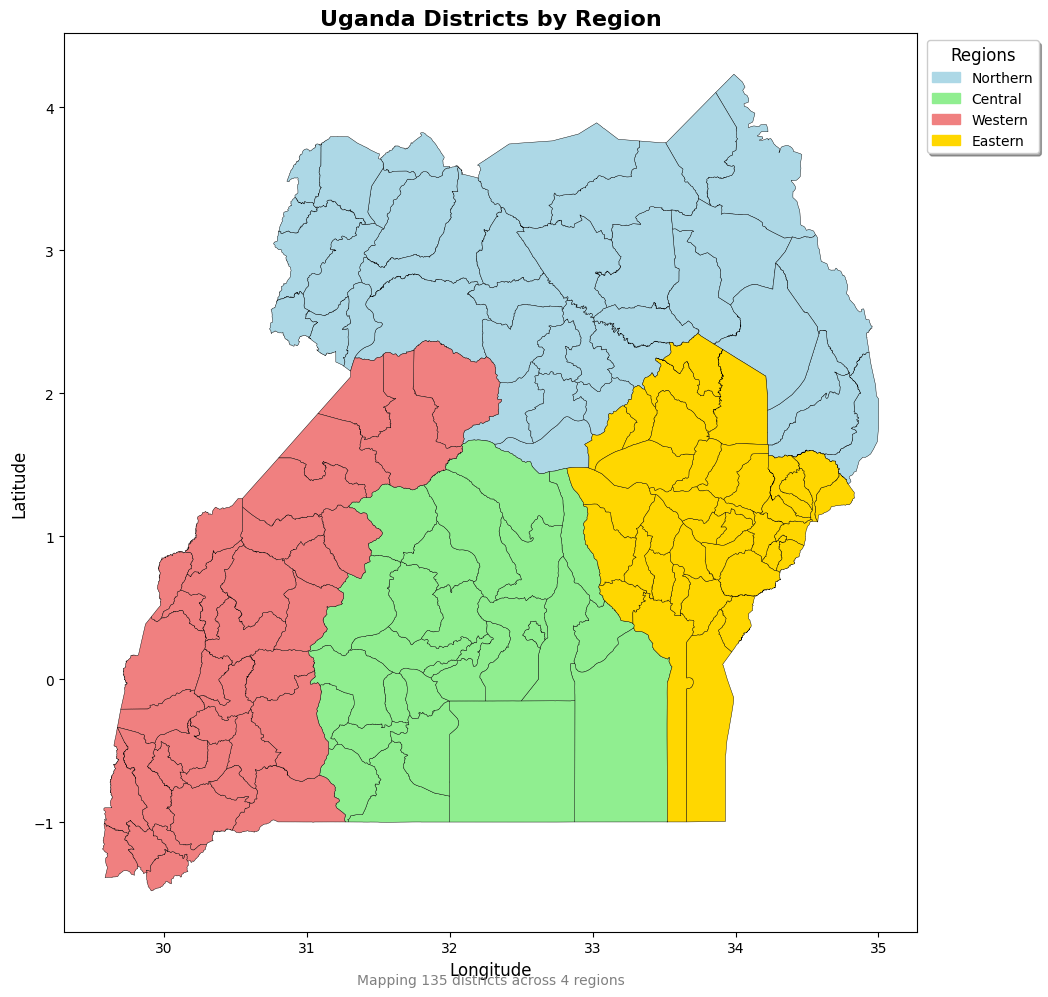

In [35]:
shapefile_path = "uga_admbnda_adm2_ubos_20200824.shp"
uganda_districts = gpd.read_file(shapefile_path)
print("Success! Shapefile loaded.")
print(f"Number of districts: {len(uganda_districts)}")
print(f"Columns: {uganda_districts.columns.tolist()}")
print(uganda_districts.head())
# Plot the districts

# Custom color mapping for Uganda's main regions
region_colors = {
    "Northern": "lightblue",
    "Central": "lightgreen",
    "Western": "lightcoral",
    "Eastern": "gold",
}

# Create the plot with custom colors
fig, ax = plt.subplots(figsize=(15, 10))

# Assign colors based on region
uganda_districts["color"] = uganda_districts["ADM1_EN"].map(region_colors)

# Plot with assigned colors
for region, color in region_colors.items():
    region_data = uganda_districts[uganda_districts["ADM1_EN"] == region]
    if not region_data.empty:
        region_data.plot(ax=ax, color=color, edgecolor="black", linewidth=0.3)

# Add legend
ax.legend(
    title="Regions",
    loc="upper right",
    bbox_to_anchor=(1.15, 1),
    fontsize=10,
    title_fontsize=12,
    handles=[
        mpatches.Patch(color=color, label=region)
        for region, color in region_colors.items()
    ],
    frameon=True,
    shadow=True,
)
plt.title("Uganda Districts by Region", fontsize=16, fontweight="bold")
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

# Add region statistics
plt.figtext(
    0.5,
    0.01,
    f"Mapping {len(uganda_districts)} districts across 4 regions",
    ha="center",
    fontsize=10,
    color="gray",
)

plt.tight_layout()
plt.savefig("uganda_districts_by_region.png", dpi=300, bbox_inches="tight")
plt.show()

In [36]:
# Create a simplified version of the shapefile
simplified_districts = uganda_districts[["ADM2_EN", "ADM1_EN", "geometry"]].copy()

# Inspect the simplified GeoDataFrame
print("\nSample of district names:")
print(uganda_districts["ADM2_EN"].head(20))

print("\nRegions in simplified data:")
print(uganda_districts["ADM1_EN"].unique())

# Ensure the simplified GeoDataFrame is valid
uganda_districts = uganda_districts.to_crs("EPSG:4326")

# Save the simplified shapefile
simplified_shapefile_path = "simplified_uganda_districts.shp"
simplified_districts.to_file(simplified_shapefile_path)
print(f"Simplified shapefile saved to {simplified_shapefile_path}")


Sample of district names:
0             Abim
1         Adjumani
2            Agago
3         Alebtong
4         Amolatar
5           Amudat
6           Amuria
7            Amuru
8             Apac
9             Arua
10          Budaka
11          Bududa
12          Bugiri
13         Bugweri
14         Buhweju
15          Buikwe
16         Bukedea
17    Bukomansimbi
18           Bukwo
19       Bulambuli
Name: ADM2_EN, dtype: object

Regions in simplified data:
['Northern' 'Eastern' 'Western' 'Central']
Simplified shapefile saved to simplified_uganda_districts.shp
